## Gaussian Random Fields

In [1]:
using Plots
using GaussianRandomFields

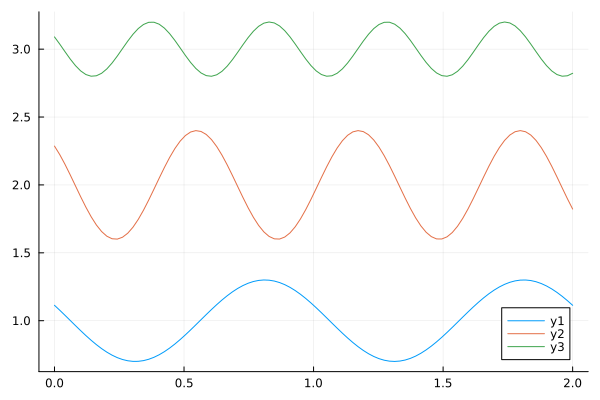

In [2]:
x = range(0, 2, length=100)
phi1 = rand(Float64)*2*pi
phi2 = rand(Float64)*2*pi
phi3 = rand(Float64)*2*pi

plot( x,sin.(x*(2*pi)*1 .+ phi1) .* 0.3 .+ 1)
plot!(x,sin.(x*(2*pi)*1.6 .+ phi2) .* 0.4 .+ 2)
waveplot = plot!(x,sin.(x*(2*pi)*2.2 .+ phi3) .* 0.2 .+ 3)

In [3]:
savefig(waveplot,"plot_waves.png")

"C:\\Users\\jansp\\Documents\\Scientific ML\\Code\\GRF\\plot_waves.png"

1. Defining the Kernel/Radial Basis Function:
\begin{align}
k_l(x_1, x_2) = exp\left(\frac{−∥x_1 − x_2∥^2}{2l^2}\right)
\end{align}

In [4]:
function radial_basis_function(l)
    """
    creates our correlation fuction for a given correlation length l
    """
    Kernel = SquaredExponential(2^0.5*l)
    return Kernel
end

function eval_GRF(Kernel,D,n_points=1001)
    """
    This function returns one evaluation of a Gaussian Random Field
    Kernel:    Kernel Function
    D:         Dimensionality
    n_points:  No. of points
    """

    pts = range(0, stop=1, length=n_points)         # n_points is the number of points
    cov = CovarianceFunction(D, Kernel)         # D is theme number of dimensions.
    if D == 1
        grf = GaussianRandomField(cov,CirculantEmbedding(), pts,minpadding=60)
    elseif D==2
        grf = GaussianRandomField(cov,CirculantEmbedding(), pts,pts,minpadding=60)
    elseif D==3
        grf = GaussianRandomField(cov,CirculantEmbedding(), pts,pts,pts,minpadding=60)
    else
        grf=0
    end
    return grf
end

eval_GRF (generic function with 2 methods)

2. Plotting some Evaluations in 1D

┌ Warning: 1846 negative eigenvalues ≥ -7.105427357601002e-15 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93
┌ Warning: 1942 negative eigenvalues ≥ -1.4210854715202004e-14 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93
┌ Warning: 2033 negative eigenvalues ≥ -2.729358229967086e-9 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93


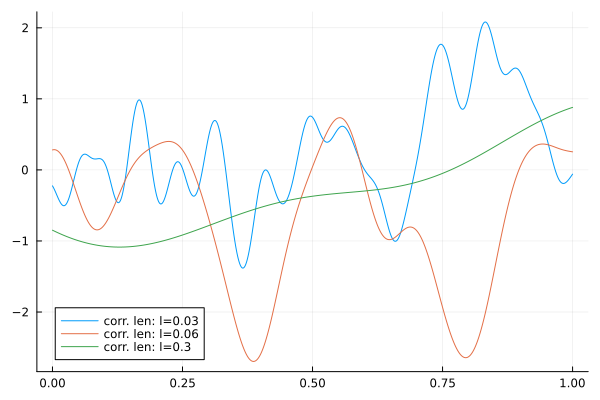

In [5]:
plot()

Dimension=1
for l in [0.03,0.06,0.3]
    Kernel = radial_basis_function(l)
    grf = eval_GRF(Kernel,Dimension)
    plot1D = plot!(grf,label="corr. len: l=$(l)")
end
plot1D = plot!()

In [6]:
savefig(plot1D,"plot1D.png")

"C:\\Users\\jansp\\Documents\\Scientific ML\\Code\\GRF\\plot1D.png"

In [7]:
l=0.05
Dimension = 2

Kernel = radial_basis_function(l)

grf = eval_GRF(Kernel,Dimension)


┌ Warning: 8374073 negative eigenvalues ≥ -1.8189894035458565e-12 detected, Gaussian random field will be 
│         approximated (ignoring all negative eigenvalues); increase padding if possible
└ @ GaussianRandomFields C:\Users\jansp\.julia\packages\GaussianRandomFields\xrE65\src\generators\circulant_embedding.jl:93


Gaussian random field with 2d Gaussian covariance function (λ=0.07071067811865477, σ=1.0, p=2.0) on a 1001×1001 structured grid, using a circulant embedding

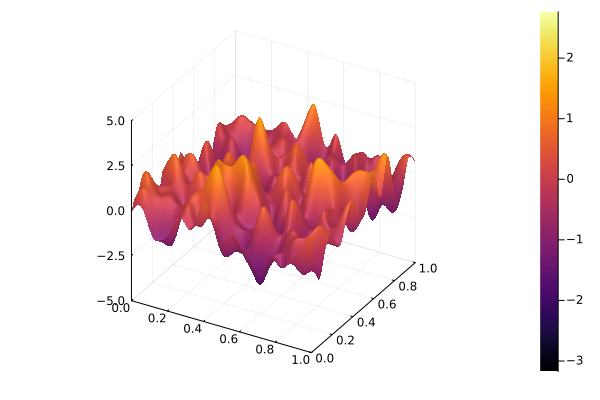

In [8]:
plot2D = surface(grf,zlims=(-5,5))

In [9]:
savefig(plot2D,"plot2D.png")

"C:\\Users\\jansp\\Documents\\Scientific ML\\Code\\GRF\\plot2D.png"